# _Python for Scientific Data Analysis_


#    Matplotlib

## Section 1: The Very Basics of Plotting with Matplotlib


### What is Matplotlib?

As the package website says (https://matplotlib.org/), **_matplotlib_** "*is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.*"  

Another way of saying this is that **matplotlib** let's you make really slick plots and other visualizations.  Or at least ones that don't look like they were done before the Internet was a thing (cough, superMongo/IRAF, cough).  

Matplotlib now forms the backbone of most of my plotting and basic data science and analysis routines: while I still like IDL's routines better for quick diagnostic plots, I've switched to **_matplotlib_** Python for most publication-grade figures. 

### Importing and Running Matplotlib

Again, matplotlib can do a ton of stuff.  But 90+% of the time, you will want to be using its core plotting capabilities contained in _pyplot_ .   To load, you type the following in either interactive Python or an executable piece of code:

In [2]:
import matplotlib.pyplot as plt

Sometimes we will want to access functions within the top-level matplotlib package itself.   In  that case

In [3]:
import matplotlib as mpl

Note: some textbooks _assume_ you know this (why? beats me).  Or they have you import _everything_ in matplotlib (e.g. ```from matplotlib import *```), which is total overkill.   We are going to be more targeted. 

### Some Simple Plots

First, let's actually do stuff with Matplotlib.

#### _A Simple Scatter Plot_

Let's begin with some very simple plots: a simple scatter plot and a line plot.   In order to do this, we need data of some kind (any kind).   

In our first example (a _**scatter**_ plot) we will just make up data: i.e. we choose an array of numbers as our x array and an equation including a random number generator from _**numpy**_ as our y array.  

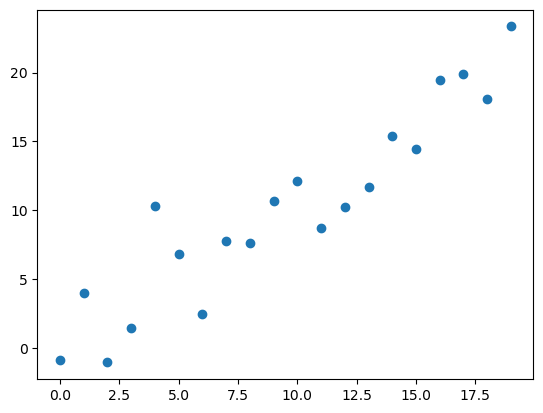

In [4]:
###(Ex_1.1) #ex1_1.py

#importing pyplot
#import matplotlib.pyplot as plt

#this will allow use NumPy's random number generator
import numpy as np 

#https://numpy.org/doc/stable/reference/generated/numpy.arange.html

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20) 
#y is same as x EXCEPT now we vary the value +/- some random number about x

#scatter plot of xarray and yarray
#plt.scatter(xarray,yarray,marker='^')
plt.scatter(xarray,yarray)

plt.show()

As a reminder, there are a lot of ways to generate random numbers, depending on what you want the distribution to look like.  The following URL gives a list of different random functions available in _**numpy**_:
[https://numpy.org/doc/stable/reference/random/legacy.html#functions-in-numpy-random]()

#### _A Simple Line Plot_

We can also plot these data as a straight line, using the ```plt.plot``` command.  We can retain the dots by adding the variable *marker* and *ms* (marker size) to the plot call (i.e. ``plt.plot(x,y,marker='o',ms=20)``).  We will get to the details of what 'marker' means and how to customize it later.

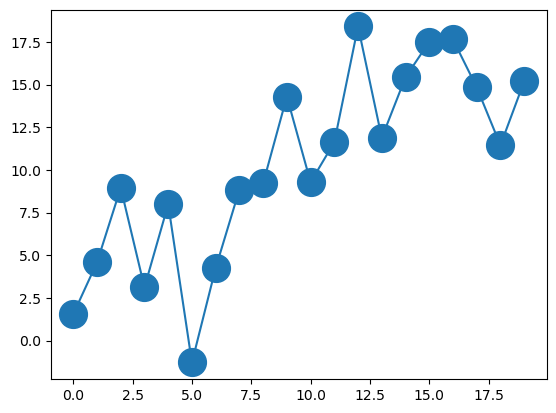

In [5]:
#import numpy as np #already did this

xarray=np.arange(20)   
yarray=np.arange(20)+3*np.random.randn(20) 

#line plot of xarray and yarray
#plt.plot(xarray,yarray, marker='o',markeredgewidth=1,ms=20)
plt.plot(xarray,yarray,marker='o',ms=20)

#### _Plotting a Simple Line Fit to Scatter Plot Data_

Now, the plot we just did simply connects different points, which isn't that interesting.  We can _fit_ data to a function using NumPy or other packages.   The simplest version of this functional fit is a polynomial fit of degree one (i.e. a straight line).   So we will need to import the _**numpy**_ package first, and then use the fitting packages to fit the data to a polynomial.  The _**numpy**_ package _*polyfit*_ can fit a polynomial function to data (which includes a straight line).

I am also going to introduce different keywords that allow you to customize your plots for individual points (i.e. for scatter plots):
* color - exactly how it sounds : works for both plt.plot and plt.scatter. 
  
* edgecolor - the code defining the boundary of the symbol you are plotting for each point if you are using a marker symbol 

 The full list of named colors is here:
  
[https://matplotlib.org/stable/gallery/color/named_colors.html]()

Here are some more:

* alpha - transparency : works for both plt.plot and plt.scatter
  
   (alpha = 1 is completely opaque, alpha=0 is completely transparent)
* sizes - denoted by ``s`` for a scatter plot, ``ms`` for a line plot.
  

0.8366750052642824 1.38406428474776


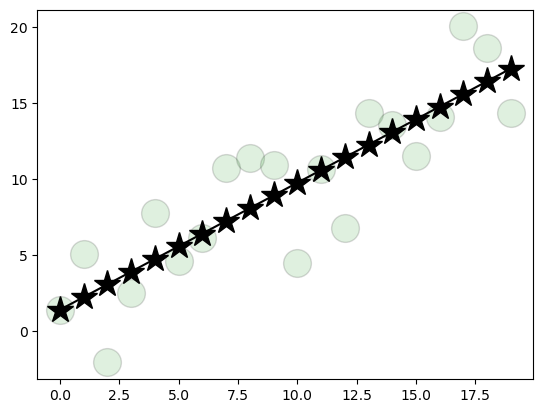

In [6]:
import numpy as np 

xarray=np.arange(20)   
yarray=np.arange(20)+2*np.random.randn(20) 

#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#a polynomial fit of degree one
a,b=np.polyfit(xarray,yarray,1)


#explore these
plt.scatter(xarray,yarray,s=400,color='tab:green',edgecolor='black',alpha=0.15)
#,facecolor='tab:green')
#plt.plot(xarray,xarray*a+b,color='black')
plt.plot(xarray,xarray*a+b,color='black',ms=20,marker='*')
print(a,b) 

### Setting Styles

Matplotlib is heavily customizable and can use a bunch of different "styles" (i.e. canned configuration sets) for visualization.  

#### _Style_  

To see your options, you use ``matplotlib.style.available``

You can see the effect of the different styles here:

[https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html]()

To set the style to some value besides that in your default do:

``plt.style.use([somevalue]``

E.g.

``plt.style.use('seaborn-v0_8')``.


To revert back to your default style do

``plt.style.use('default')``

In [7]:
import matplotlib as mpl

###
#mpl.style.available

#When I run this, I get the following:

from matplotlib import style

style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#### _rcParams_  

The default (or any other) style consists of a number of individual settings.  Instead of going from one canned configuration to another, you can adjust individual settings using ``rcParams``.  You can figure out what these parameters are by:


In [8]:
from matplotlib import rcParams
import matplotlib

#then

rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

You can change individual settings by accessing rcParams.  

For instance we have been changing the default figure size throughout this course to be something larger than the nominal [6.4,4.8] dimensions:

In [9]:
rcParams.get('figure.figsize')
#rcParams['figure.figsize']=[12,8]
rcParams.get('ytick.right')

False

In [10]:
#rcParams['figure.figsize']='default'
#rcParams.update(matplotlib.rcParamsDefault)

To return the current parameter you type...

In [11]:
rcParams.get('figure.figsize')

[6.4, 4.8]

... and restore the original value...

In [12]:
# Restore the default figure size
rcParams.update({'figure.figsize': plt.rcParamsDefault['figure.figsize']})
rcParams.get('figure.figsize')

[6.4, 4.8]

#### _Additional Style Settings_

Another example: by default, the axis grid is turned off.  To turn it on,

```
rcParams['axes.grid']=True
```

You can also turn it on via ``plt``

``plt.grid()``

or (later) by the ax object if we create a fig,ax pair : ``ax.grid()``  (if you don't know what this means, don't worry about it for now).

To turn it back off do

``plt.grid('off')``.

By default, matplotlib will display all the axis markups (e.g. the outer border of the plot, numbers, ticks, etc.).   You almost always want to have these but if you want to turn them off -- e.g. in our NumPy part 9 section where we displayed digits in a grid -- you can.  There, the call is ...

``plt.axis('off')``

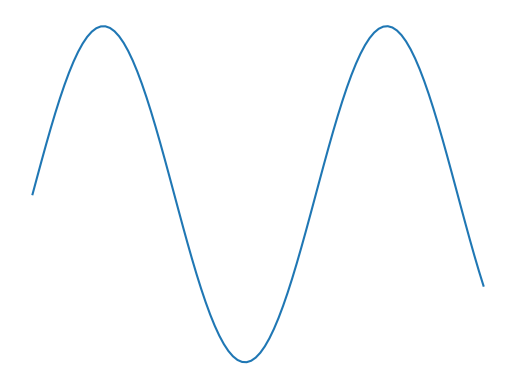

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.plot(x, y)

# Turn off the axes
plt.axis('off')

# Display the plot
plt.show()

### Displaying Plots and Images

Matplotlib is a visualization package, so then how do you actually visualize images and plots?   The best way to display graphics from Matplotlib depends on how you are using it.  

_plt.show()_

The primary way I use it is within an executed Python function.   In this case, the key command is ``plt.show()``.

 ``plt.show()`` is just how it sounds: you create a plot with data, axes, labels, and other stuff you want to include and then just show the plot.   
 
 It is usually pretty solid but it works by interacting with your systems interactive graphical backend.  So if your system setup is odd (most often Windows is the problem child; MacOS should be fine), you might run into trouble.  But in most cases, this is not an issue.
 
  _plotting from wihtin iPython shell_

 
 As vanderPlas says, "it can be very convenient to use Matplotlib interactively within an IPython shell (see IPython: Beyond Normal Python). IPython is built to work well with Matplotlib if you specify Matplotlib mode." (sorry, I felt like just copying and pasting).

To make this work, you first do 
 
 ```
In [1]: %matplotlib
Using matplotlib backend: TkAgg
```
then

```

In [2]: import matplotlib.pyplot as plt
 
 ``` 
 
 Now, any ``plt`` command will cause a graphics window to open.Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use plt.draw(). Using plt.show() in Matplotlib mode is not required.

_matplotlib %inline_
 
 If you use Jupyter Notebooks, you are probably familiar with this one.   
 
 The key command (after importing matplotlib.pyplot as plt) is 
 
 ```
 %matplotlib inline
 
 ```
 
 After running this command (it needs to be done only once per kernel/session), any cell within the Jupyter notebook that creates a plot will embed a PNG image of the resulting graphic.
 
This is great for pedogagy (er, teaching).  But professional code is usually a lot more complex, so its usefulness beyond learning stuff in the class may be limited.

---

For this notebook I am going to use %matplotlib inline.  To make display easier, I'm also going to make the images a larger default size with rcParams.

In [14]:
%matplotlib inline
rcParams['figure.figsize']=[12,8]

#plt.savefig([name of file.png],dpi=[some number])

### Saving Output

One thing I really like about Matplotlib is the ability to save graphics to a file in a wide range of formats without a lot off guff.  The basic command to remember is:

```
plt.savefig([name of figure].[extension]).  

```

The ``[extension]`` should indicate the type of file.  As an example, say you want to save the file as "Figure_1" with the format of a PNG.   Then your command is going to be

```
[do all the matplotlib plot-y stuff to create the figure]

plt.savefig("Figure_1.png")

```

For PDF ...

```
[do all the matplotlib plot-y stuff to create the figure]

plt.savefig("Figure_1.pdf")

```

And so on.   To see all the supported file types do this:

```
import matplotlib.pyplot as plt
fig=plt.figure()

fig.canvas.get_supported_filetypes()
#this will print out a lot of stuff
```

e.g.

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 1200x800 with 0 Axes>

You will see eps, jpg, jpeg,pdf,png,ps, ...etc etc.   


But the ones I always use now are either:

* png (for quick figures) 
* pdf (for vectorized figures that Science and Nature will not complain about).

Encapsulated postscript (eps) is older but also vectorized (good!) but it's kind of a weird format.   Some platforms don't like it and will want you to convert to PDF anyway (this happens to me with bibtex).

---

Other key parameters include:

* dpi  - "dots per inch".  The resolution in dots per inch. If 'figure', use the figure's dpi value.
* bbox_inches - bbox_inches = 'tight' removes all the extra white space around the figure.
  

Let's go back to our line plot example and save it.  Watch for some Python trickery below to have a 'clean' way of producing output.

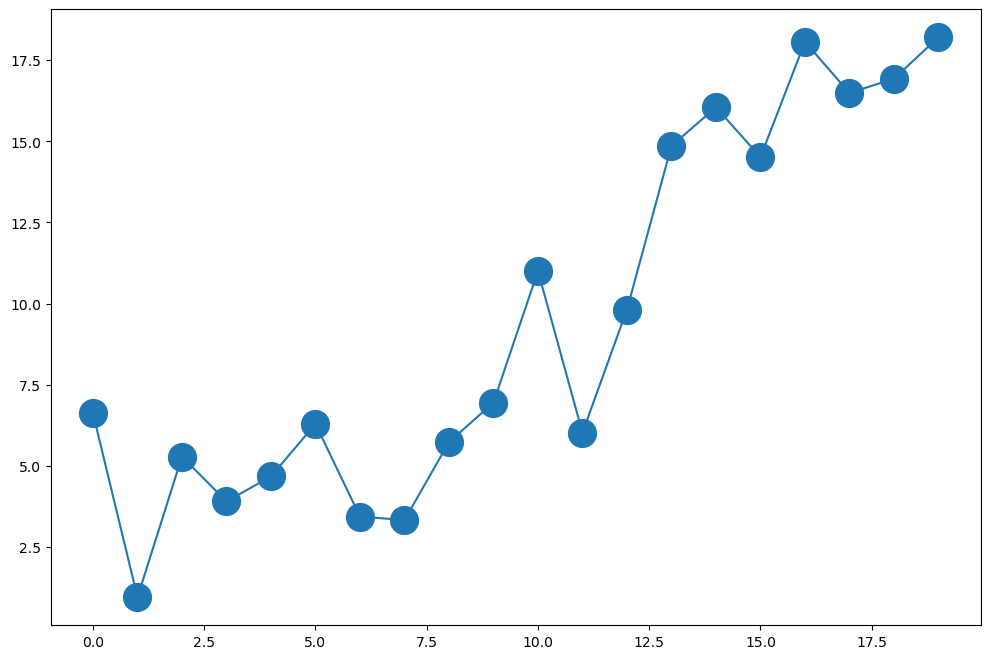

In [16]:
import os

xarray=np.arange(20)   
yarray=np.arange(20)+3*np.random.randn(20) 

#line plot of xarray and yarray
plt.plot(xarray,yarray, marker='o',markeredgewidth=1,ms=20)

outputpathname='./plots/'
outputfilename='alineplot.png'

#see if you have a directory called "./plots", if you don't have one then make the directory.
if os.path.isdir(outputpathname) is False:
    os.mkdir(outputpathname)

#if you want the plot in your working directory
#plt.savefig('alineplot.png')

#hardwired version combining the directory and filename
#plt.savefig('./plots/alineplot.png')

#general version combining the directory and filename
plt.savefig(outputpathname+outputfilename)



Now, we can display back this file in Python using ``Image``

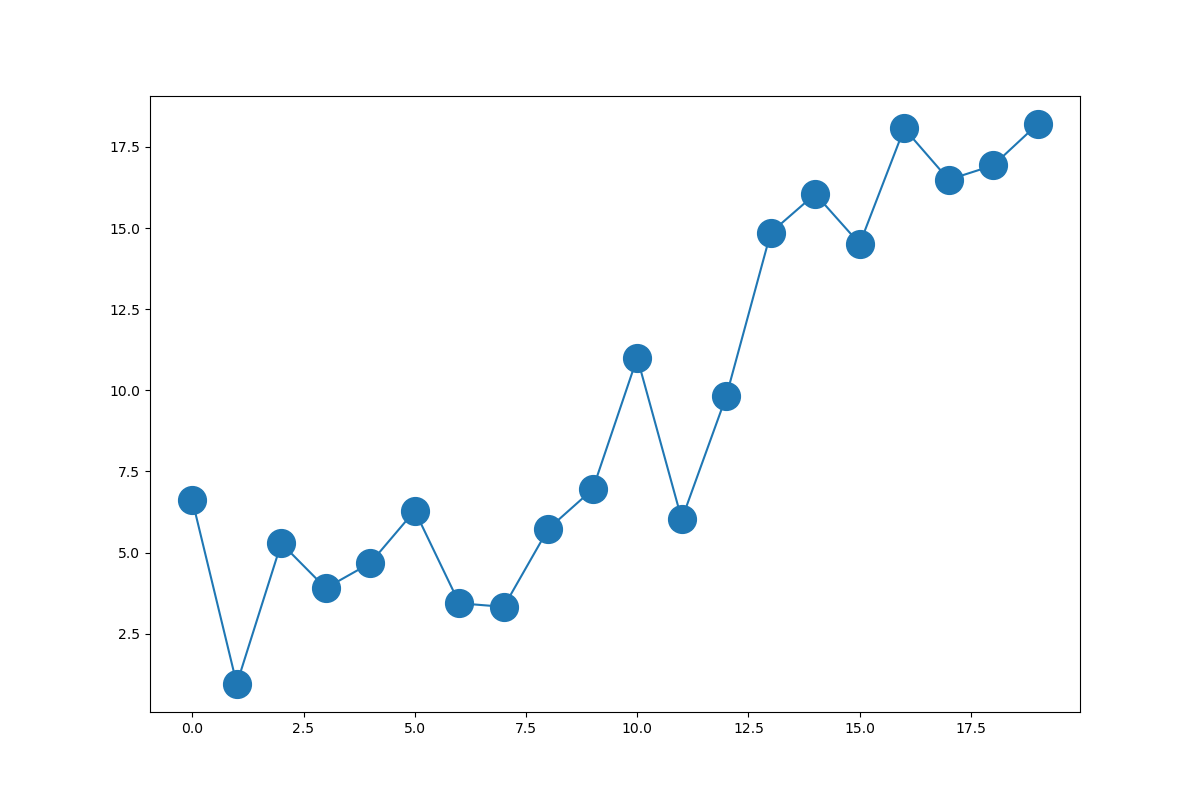

In [17]:
from IPython.display import Image
Image(outputpathname+outputfilename)

Now, ``.png`` files are "raster-ized" files, meaning that they have a fixed number of pixels.  If you try to resize/zoom-in the images will get blurry.  Some research journals are okay with png or other rasterized files (including, gasp, jpegs). 

Others are not.  For example, Science (and, if I remember right, Nature) **demands** that you have all your artwork saved as _vectorized_ files: _vectorized_ files are essentially made up of equations so that if you zoom in and in more, you never get a blurry image/do not lose quality.

Pro-tip: when possible, always save plots/images you want to put into a paper in _vectorized_ form.  In old days in, say, the Astrophysical Journal, this meant Encapsulated Postscript.  Now, you can save with PDFs with relative ease (``.pdf``), so that's what I do 90% of the time.

Now, reading back in a PDF file is a little trickier but still doable.  For example, if we saved the above line plot as a PDF named ``alineplot.pdf``, we would do the following to display it: 

In [18]:
from IPython.display import IFrame
IFrame(outputpathname+'alineplot.pdf',width=1000,height=700)

Note, you need to give IFrame positional arguments of width and height.